# Analysis of Earthquakes in California.

In this notebook I build a map of historical earthquakes in California from 2013 to 2023.

#### Import necessary packages.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import shapely as shp
import sys
import sqlalchemy as sqla
from xml.etree import ElementTree as ET

sys.path.append('../')
import tools as tls

%matplotlib inline

#### Load the California Zipcode Shapefile to a dataframe.

In [2]:
cali_zip_shp = '/Users/skylar_calvin/Library/CloudStorage/OneDrive-UniversityofMissouri/Data/Cali_Zipcodes/California_Zip_Codes.shp'

In [3]:
cali_zips = gpd.GeoDataFrame.from_file(cali_zip_shp)

/Users/skylar_calvin/MIZ Repos/.venv/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: /Users/skylar_calvin/Library/CloudStorage/OneDrive-UniversityofMissouri/Data/Cali_Zipcodes/California_Zip_Codes.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


In [4]:
cali_zips.to_crs(epsg=4326, inplace=True)

In [5]:
cali_zips

,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,geometry
0,00012,Mt Meadows Area,CA,-99,-99.00,30.92,"POLYGON ((-120.84352 40.24962, -120.84414 40.2..."
1,00016,Sequoia National Forest,CA,-99,-99.00,39.33,"POLYGON ((-118.44021 35.55794, -118.48421 35.5..."
2,00017,Northeast Fresno County,CA,-99,-99.00,564.38,"POLYGON ((-118.77501 37.46305, -118.77539 37.4..."
3,00018,Los Padres Ntl Forest,CA,-99,-99.00,90.83,"POLYGON ((-118.81778 34.56244, -118.84141 34.5..."
4,00019,Lassen Ntl Forest,CA,-99,-99.00,412.59,"POLYGON ((-119.99861 40.77159, -119.99894 40.7..."
...,...,...,...,...,...,...,...
1716,96146,Olympic Valley,CA,1152,149.42,7.71,"POLYGON ((-120.20156 39.21418, -120.20197 39.2..."
1717,96148,Tahoe Vista,CA,1487,991.33,1.50,"POLYGON ((-120.03947 39.23825, -120.03916 39.2..."
1718,96150,South Lake Tahoe,CA,32999,151.87,217.28,"POLYGON ((-119.94957 38.96422, -120.00102 38.9..."
1719,96161,Truckee,CA,19416,99.57,194.99,"POLYGON ((-120.09864 39.44512, -120.12026 39.4..."


<Axes: >

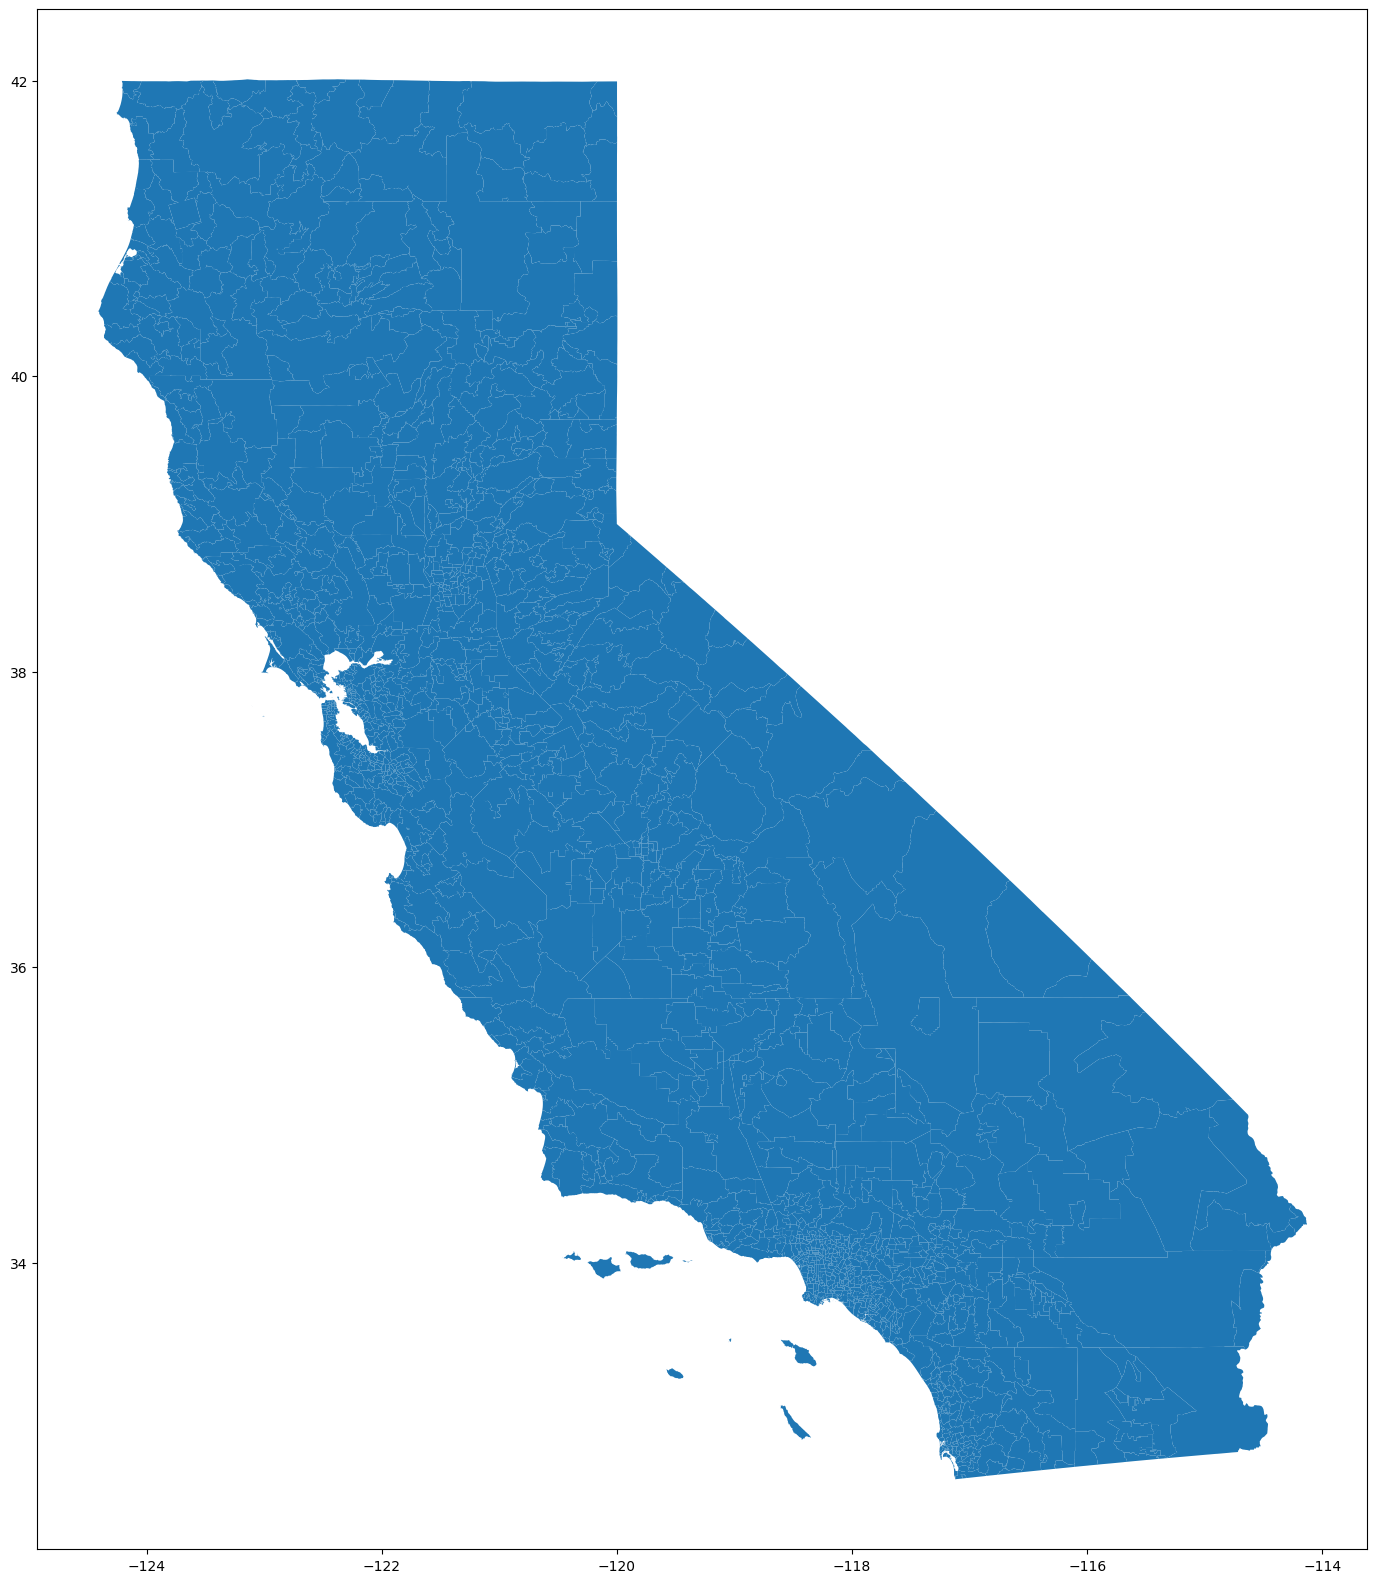

In [6]:
cali_zips.plot(figsize=(20,20))

#### Process the cali_earthquakes.kml file.

In [7]:
# Load and parse the xml file.
tree = ET.parse('/Users/skylar_calvin/Library/CloudStorage/OneDrive-UniversityofMissouri/Data/Cali_Earthquakes_2010-2023.kml')
root = tree.getroot()

# Define the namespace.
namespace = {'kml': 'http://www.opengis.net/kml/2.2'}

# Extract the Placemark elements.
placemarks = root.findall('.//kml:Placemark', namespace)

In [8]:
placemarks[5].text

In [9]:
points = []

for placemark in placemarks:
    
    point = placemark.find('.//kml:coordinates', namespace)
    
    if point is None:
        
        points.append('')
        
    else:
        
        # Replace the first commas in the coordinates wih spaces, and the spaces between the pairs with commas.
        p = point.text # Save the string to a variable.
        p = p.split(',') # Split the string into a list.
        
        points.append(p)

In [10]:
type(points[0])

list

In [11]:
geom = []

for point in points:

    geometry = shp.geometry.Point(point)

    geom.append(geometry)

In [12]:
geom

[<POINT Z (-116.797 33.679 0)>,
 <POINT Z (-123.306 39.01 0)>,
 <POINT Z (-117.57 35.747 0)>,
 <POINT Z (-118.645 35.4 0)>,
 <POINT Z (-114.284 37.822 0)>,
 <POINT Z (-121.248 35.745 0)>,
 <POINT Z (-115.546 32.411 0)>,
 <POINT Z (-122.799 38.814 0)>,
 <POINT Z (-115.524 32.416 0)>,
 <POINT Z (-120.784 35.236 0)>,
 <POINT Z (-117.686 35.924 0)>,
 <POINT Z (-117.684 35.925 0)>,
 <POINT Z (-117.684 35.923 0)>,
 <POINT Z (-117.682 35.929 0)>,
 <POINT Z (-117.684 35.927 0)>,
 <POINT Z (-117.686 35.924 0)>,
 <POINT Z (-117.516 35.707 0)>,
 <POINT Z (-117.436 34.134 0)>,
 <POINT Z (-123.46 41.304 0)>,
 <POINT Z (-122.133 37.367 0)>,
 <POINT Z (-116.344 34.012 0)>,
 <POINT Z (-117.977 33.68 0)>,
 <POINT Z (-119.631 39.62 0)>,
 <POINT Z (-115.937 40.627 0)>,
 <POINT Z (-122.816 38.846 0)>,
 <POINT Z (-117.835 38.169 0)>,
 <POINT Z (-118.623 37.418 0)>,
 <POINT Z (-122.077 39.749 0)>,
 <POINT Z (-117.026 34.296 0)>,
 <POINT Z (-119.635 39.623 0)>,
 <POINT Z (-119.631 39.618 0)>,
 <POINT Z (-117

In [13]:
cali_earthquakes = gpd.GeoSeries(geom)

<Axes: >

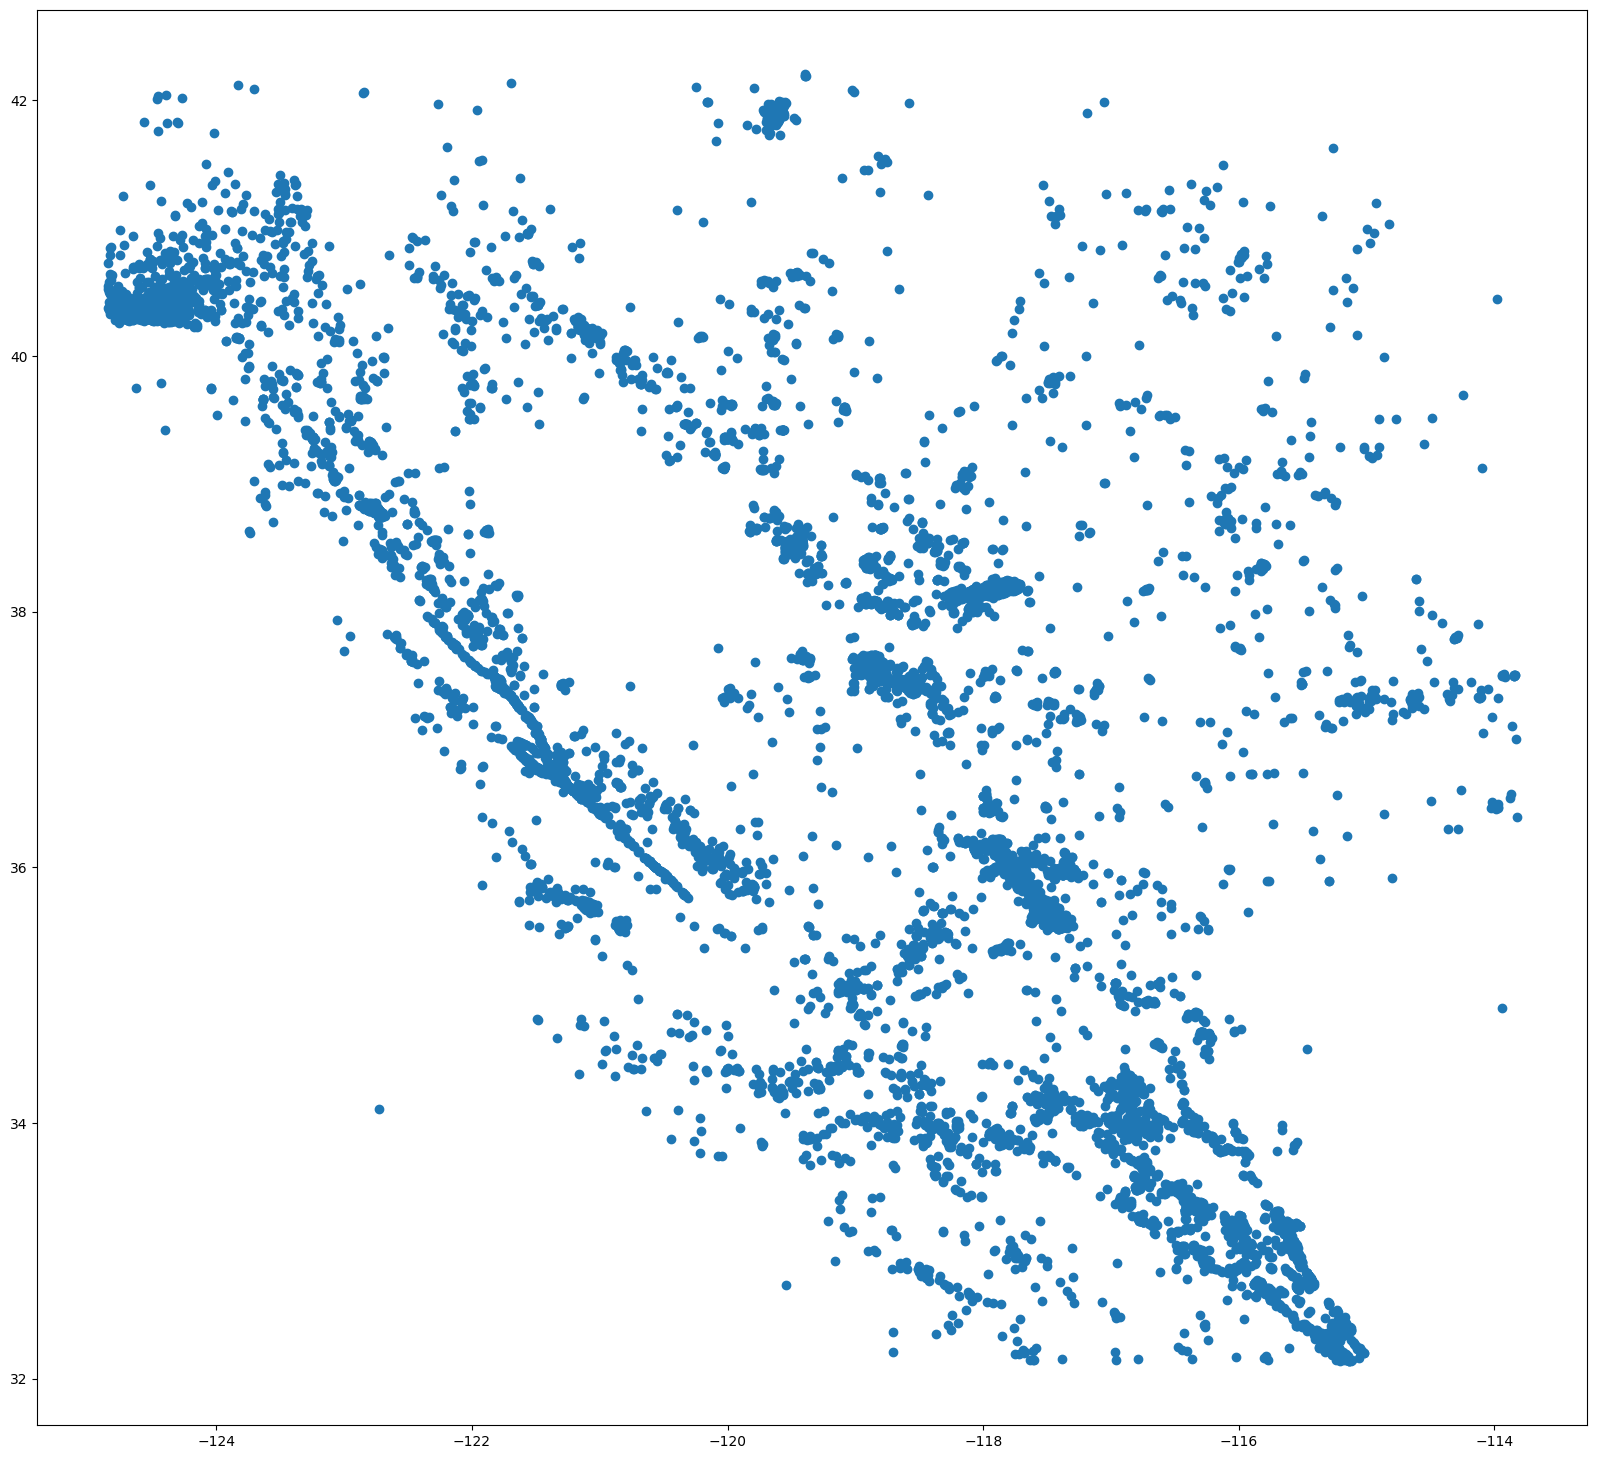

In [14]:
cali_earthquakes.plot(figsize=(20,20))

In [15]:
cali_earthquakes

0        POINT Z (-116.79667 33.67867 0)
1          POINT Z (-123.306 39.01033 0)
2        POINT Z (-117.57033 35.74733 0)
3        POINT Z (-118.64517 35.40033 0)
4          POINT Z (-114.2836 37.8215 0)
                      ...               
16275    POINT Z (-124.58683 40.31783 0)
16276    POINT Z (-122.81183 38.81133 0)
16277    POINT Z (-117.27983 34.04933 0)
16278    POINT Z (-123.56667 39.78083 0)
16279     POINT Z (-123.7495 40.31967 0)
Length: 16280, dtype: geometry

<Axes: >

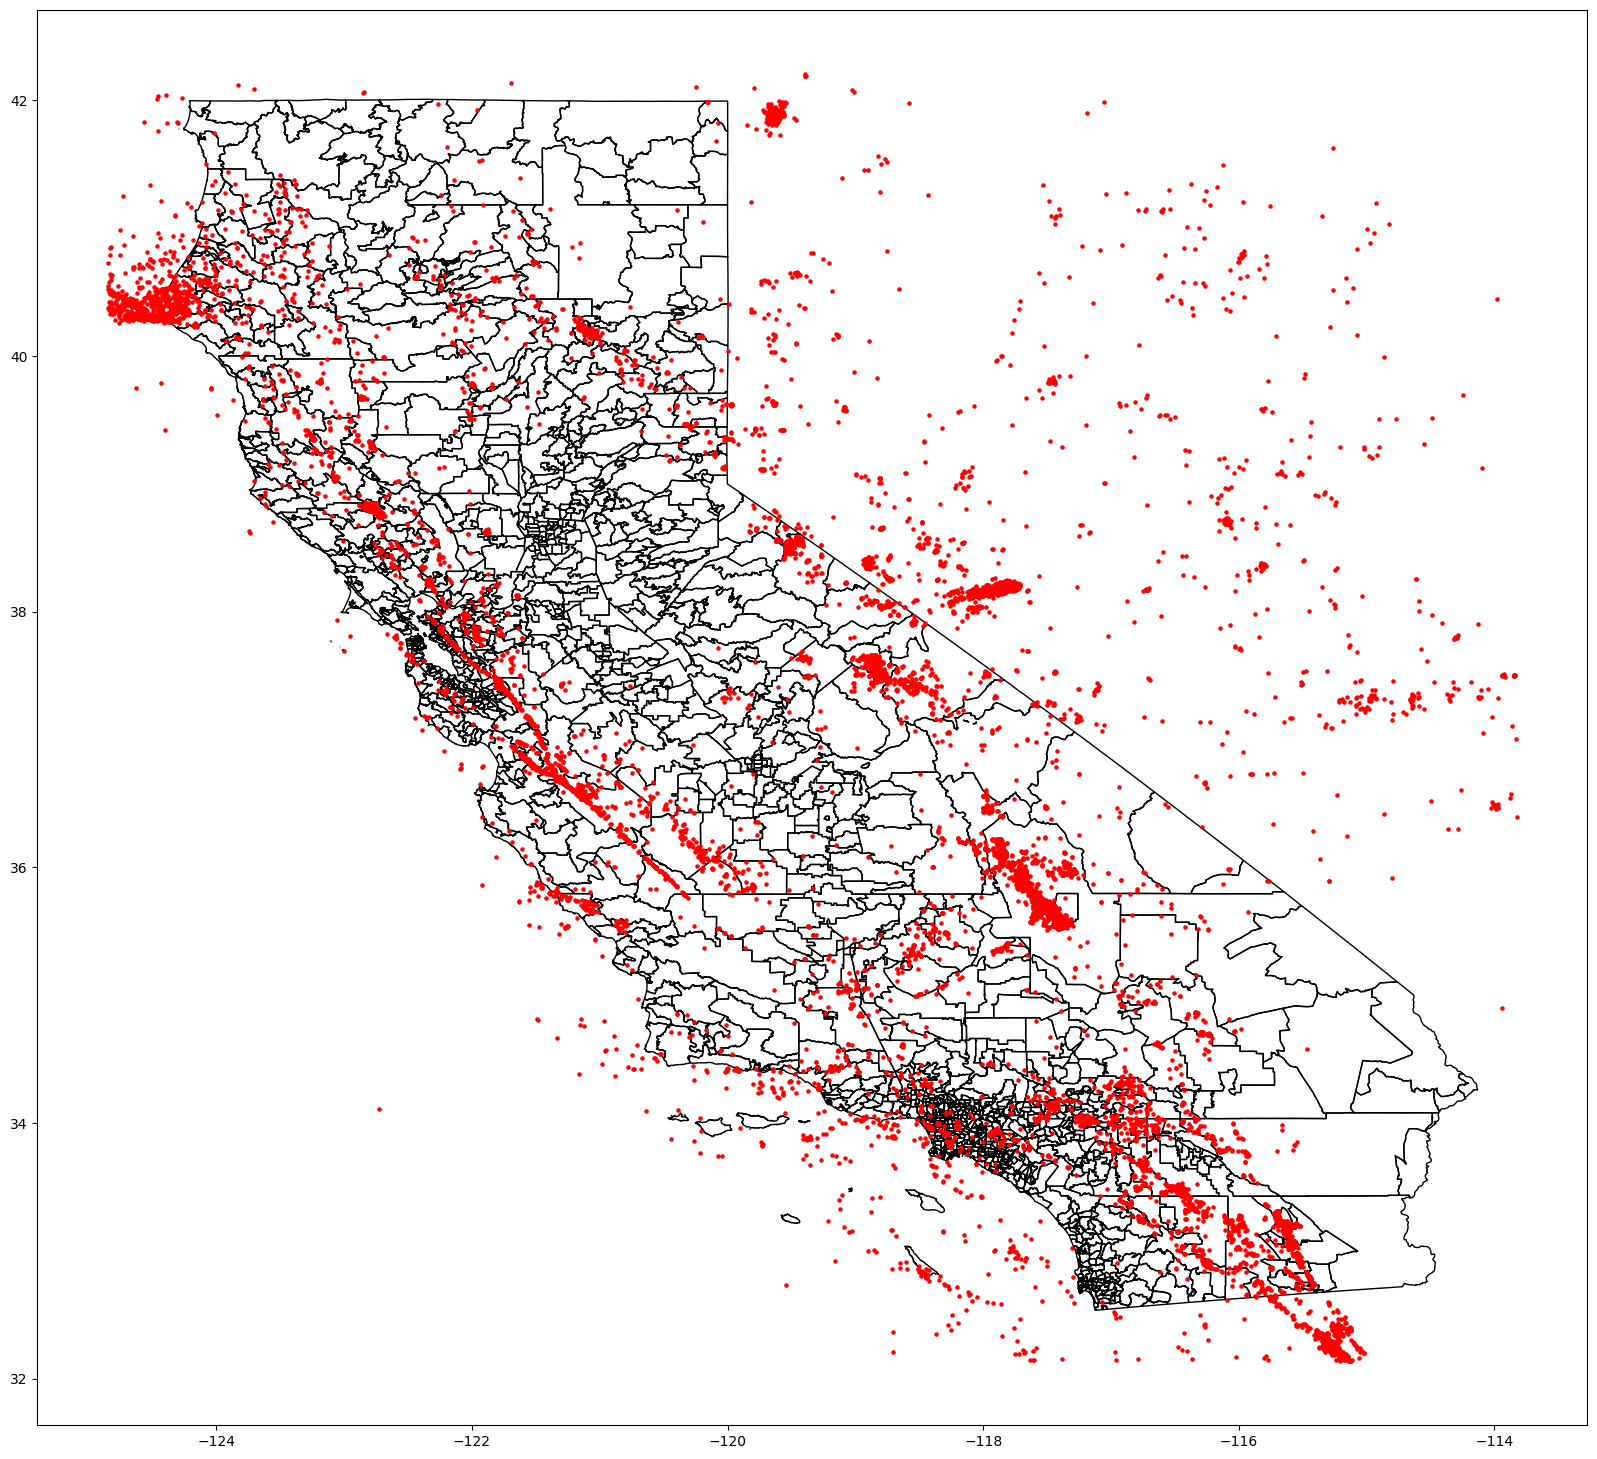

In [16]:
fig, ax = plt.subplots(figsize=(20,20))

cali_zips.plot(ax=ax, color='none', edgecolor='black')
cali_earthquakes.plot(ax=ax, color='red', markersize=5)

In [17]:
mo_zips = gpd.GeoDataFrame.from_file('/Users/skylar_calvin/Library/CloudStorage/OneDrive-UniversityofMissouri/Data/MO_TIGER_5_Digit_Zip_Code_Tabulation_Areas/MO_TIGER_5_Digit_Zip_Code_Tabulation_Areas.shp')

In [18]:
mo_zips.to_crs(epsg=4326, inplace=True)

<Axes: >

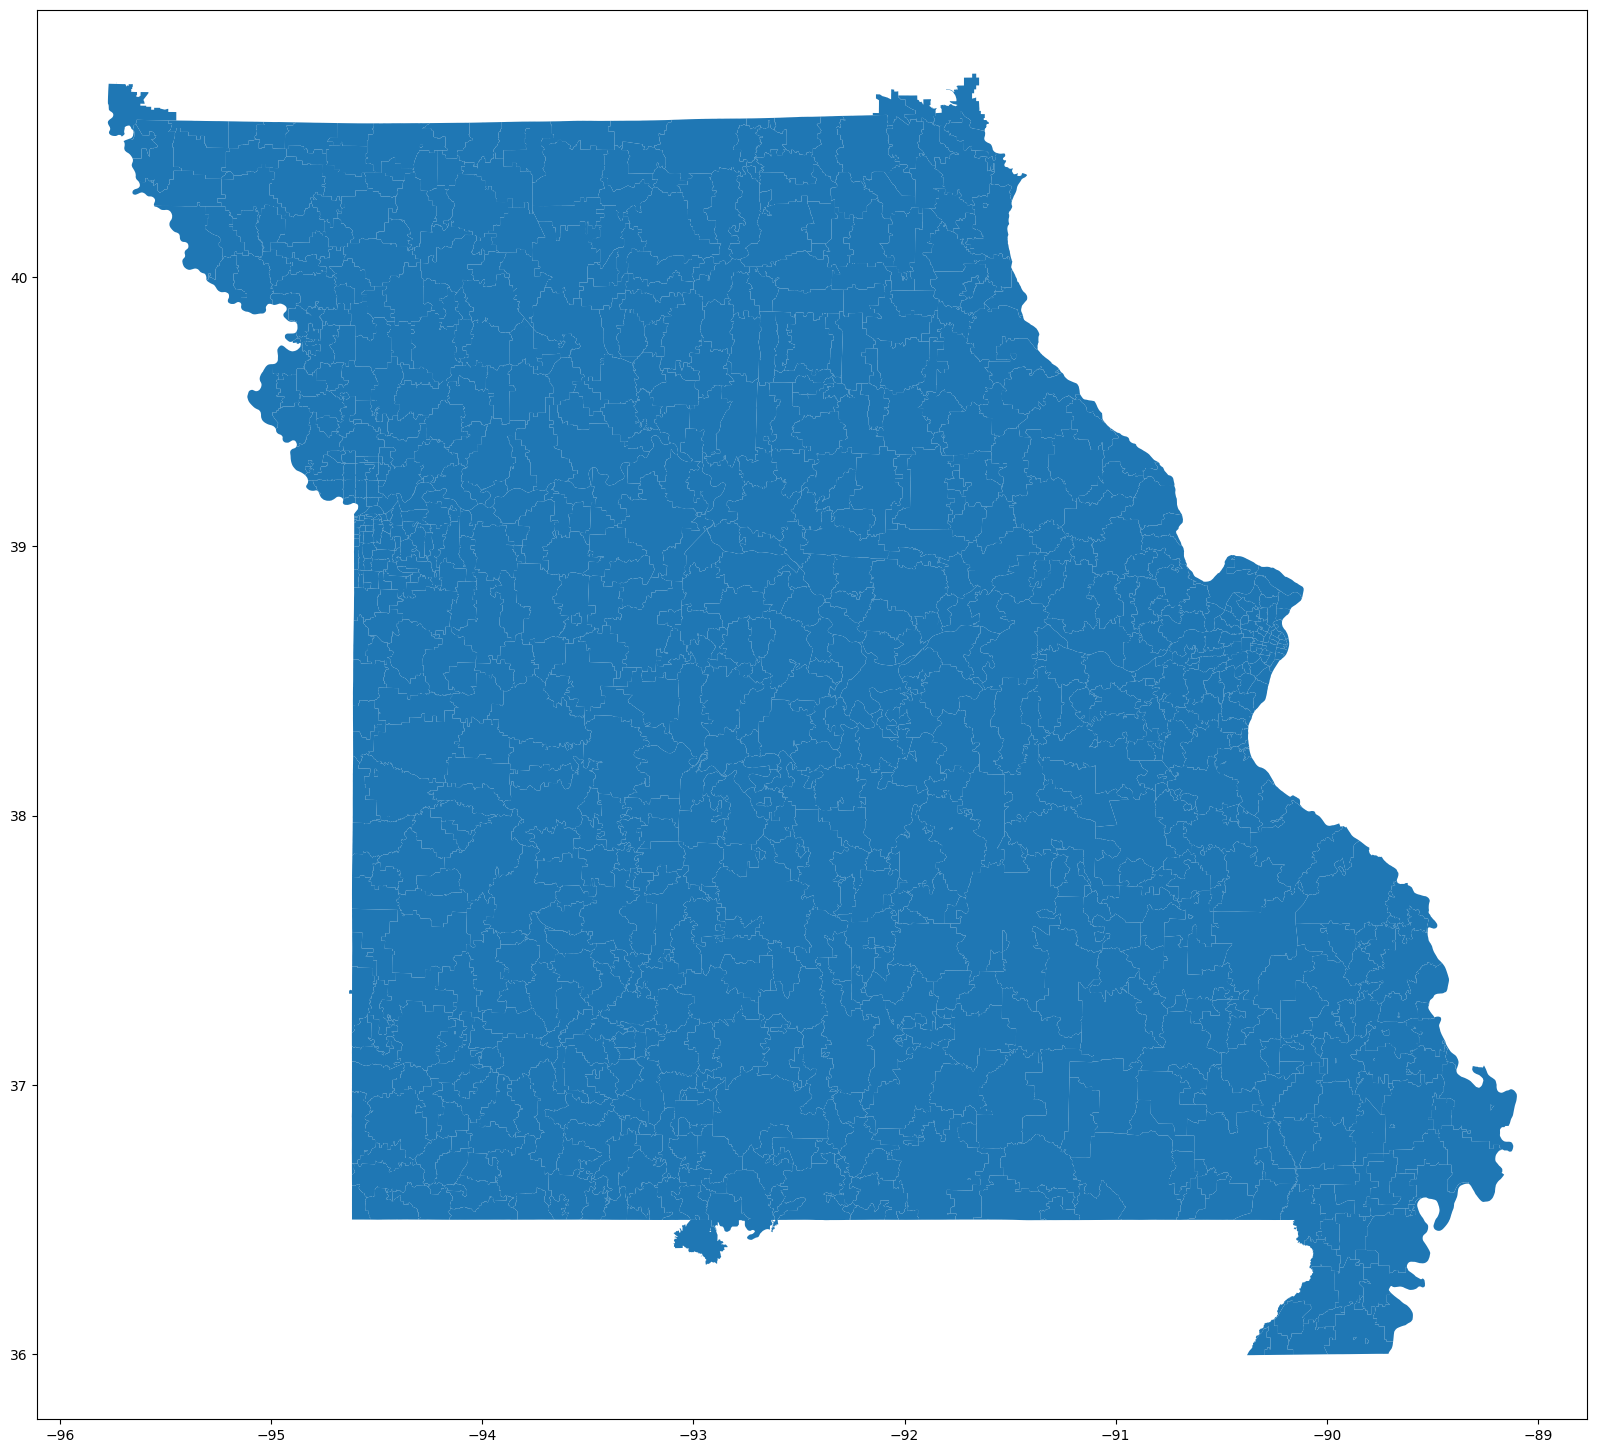

In [19]:
mo_zips.plot(figsize=(20,20))

In [20]:
# Load and parse the xml file.
tree = ET.parse('/Users/skylar_calvin/Library/CloudStorage/OneDrive-UniversityofMissouri/Data/Missouri_Earthquakes_2013-2023.kml')
root = tree.getroot()

# Define the namespace.
namespace = {'kml': 'http://www.opengis.net/kml/2.2'}

# Extract the Placemark elements.
placemarks = root.findall('.//kml:Placemark', namespace)

In [21]:
points = []

for placemark in placemarks:
    
    point = placemark.find('.//kml:coordinates', namespace)
    
    if point is None:
        
        points.append('')
        
    else:
        
        # Replace the first commas in the coordinates wih spaces, and the spaces between the pairs with commas.
        p = point.text # Save the string to a variable.
        p = p.split(',') # Split the string into a list.
        
        points.append(p)

In [22]:
geom = []

for point in points:

    geometry = shp.geometry.Point(point)

    geom.append(geometry)

In [23]:
mo_earthquakes = gpd.GeoSeries(geom)

<Axes: >

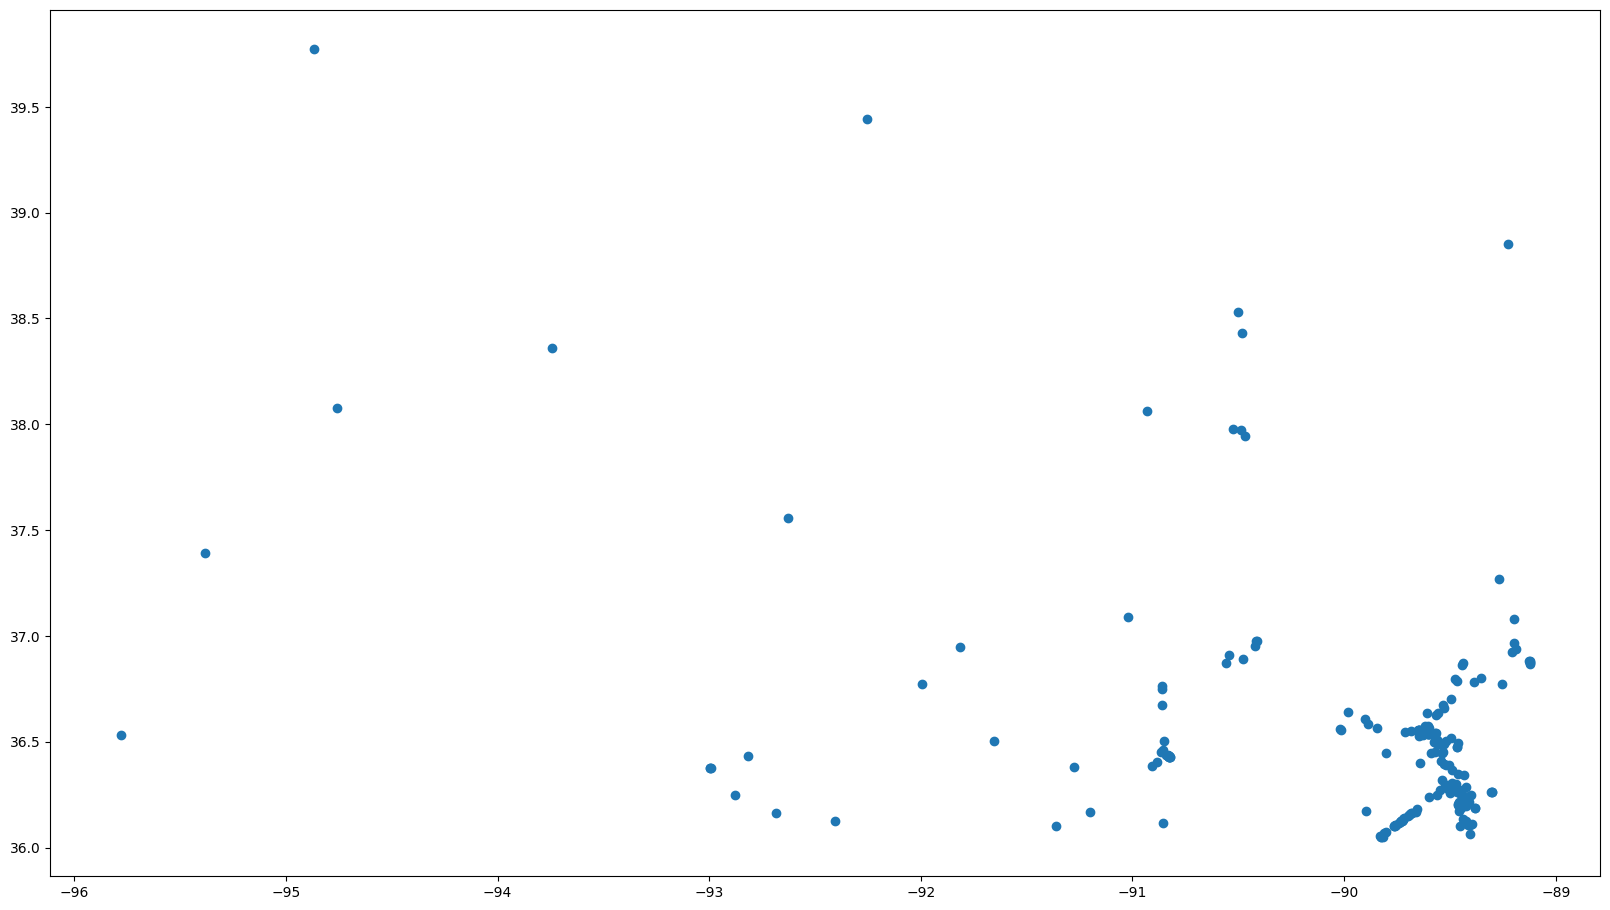

In [24]:
mo_earthquakes.plot(figsize=(20,20))

<Axes: >

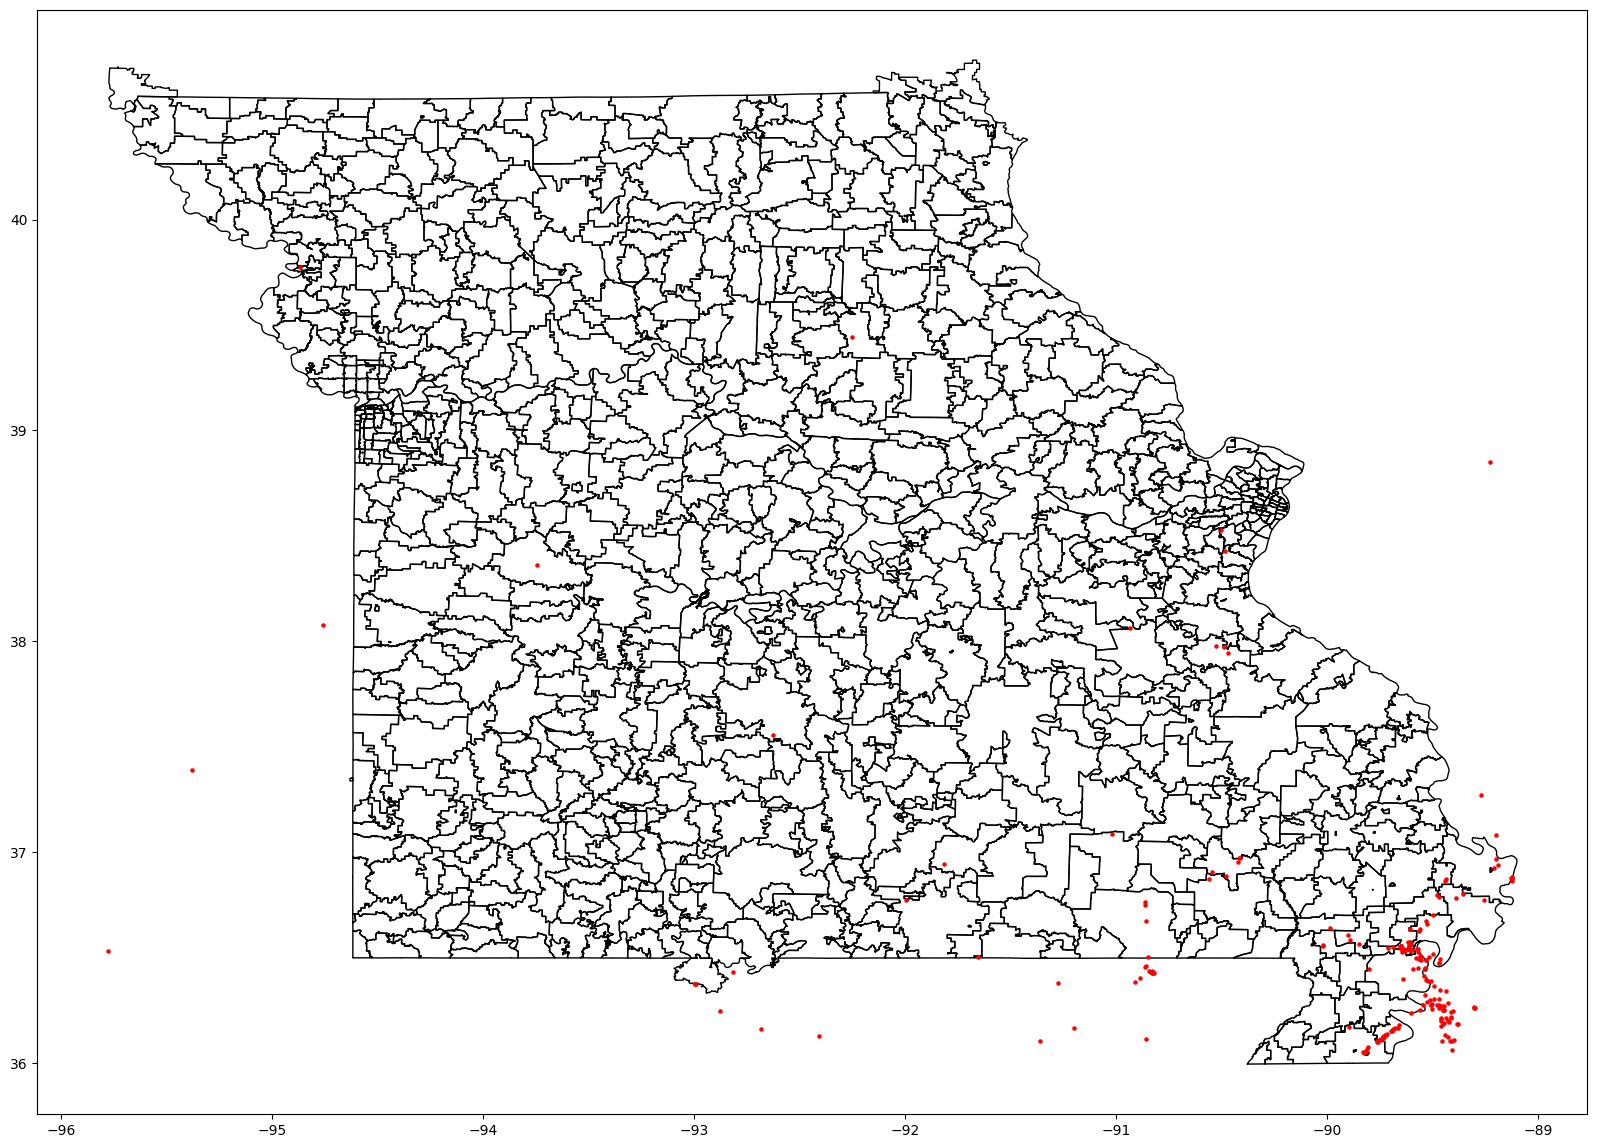

In [25]:
fig, ax = plt.subplots(figsize=(20,20))

mo_zips.plot(ax=ax, color='none', edgecolor='black')
mo_earthquakes.plot(ax=ax, color='red', markersize=5)

#### Connect and load data to the postgres database.

In [26]:
# Database username.
un = input('Please enter username: ')

# Only use if you need to use a password for the database.
#pwd = q(gp('Please enter password: '))

# The port number the database is running on.
port = input('Please enter the port number postgress is running on: ')

In [38]:
constring = 'postgresql://' + un + '@localhost:' + port + '/life_data'

In [44]:
engine = sqla.create_engine(constring)

In [46]:
mo_earthquakes = gpd.GeoDataFrame(mo_earthquakes, columns=['geometry'])

In [47]:
with engine.connect() as con:

    mo_zips.to_postgis('mo_zips', con, if_exists = 'replace', schema = 'zipcodes', index = False)

    mo_earthquakes.to_postgis('mo_earthquakes', con, if_exists = 'replace', schema = 'zipcodes', index = False)

/Users/skylar_calvin/MIZ Repos/.venv/lib/python3.12/site-packages/geopandas/io/sql.py:409: UserWarning: Could not parse CRS from the GeoDataFrame. Inserting data without defined CRS.
  srid = _get_srid_from_crs(gdf)


In [31]:
mo_zips

,FID,ZCTA5CE20,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape__Are,Shape__Len,geometry
0,1,63447,63447,860Z200US63447,B5,G6350,S,233733071,634796,+40.0944045,-091.9088955,4.009343e+08,154679.866111,"POLYGON ((-91.9747 40.05489, -91.9742 40.05504..."
1,2,65049,65049,860Z200US65049,B5,G6350,S,48003890,25102012,+38.1999578,-092.6745205,1.185691e+08,59951.988340,"POLYGON ((-92.76453 38.19187, -92.76445 38.194..."
2,3,63051,63051,860Z200US63051,B5,G6350,S,111402766,639431,+38.3777772,-090.5766352,1.827032e+08,99728.633699,"POLYGON ((-90.67666 38.41513, -90.6758 38.4151..."
3,4,65010,65010,860Z200US65010,B5,G6350,S,157274868,459070,+38.7878104,-092.2419747,2.599888e+08,129396.743845,"POLYGON ((-92.37625 38.80168, -92.37601 38.801..."
4,5,65801,65801,860Z200US65801,B5,G6350,S,53806,0,+37.2142104,-093.2952177,8.499184e+04,1181.680062,"POLYGON ((-93.29637 37.21363, -93.29635 37.214..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,1038,66760,66760,860Z200US66760,B5,G6350,S,1774276,9684,+37.3483159,-094.6243525,2.827665e+06,7205.644037,"POLYGON ((-94.63161 37.33931, -94.6316 37.3411..."
1038,1039,72644,72644,860Z200US72644,B5,G6350,S,227623245,18272748,+36.4146060,-092.9677577,3.805540e+08,139622.125937,"POLYGON ((-93.09438 36.44948, -93.09412 36.449..."
1039,1040,65733,65733,860Z200US65733,B5,G6350,S,168401366,20636087,+36.5330973,-092.8512451,2.933590e+08,103375.693507,"POLYGON ((-92.94167 36.52611, -92.94092 36.527..."
1040,1041,65729,65729,860Z200US65729,B5,G6350,S,52211614,3315100,+36.5388895,-092.5635121,8.618449e+07,88741.226623,"POLYGON ((-92.63345 36.45531, -92.63336 36.455..."
